In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import h5py 
import datetime
import glob
import copy
from calendar import monthrange
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

import sys
sys.path.append('d:\\gitCCA\\cca-jupyter\\py\\')
import mapper_functions as mpf

In [2]:
### BEGIN: rango del mapa
latmin = 18.3
latmax = 20.5
lonmin = -100.5
lonmax = -97.7
#latmin = 19.1
#latmax = 19.8
#lonmin = -99.5
#lonmax = -98.7
#latmin = 20
#latmax = 21
#lonmin = -104
#lonmax = -103
### END: rango del mapa

### BEGIN: parametros para funciones del modulo mapper_functions
nx=50
ny=50
footprintradio = 10.0/110.0
pathname = 'd:\\CCA\\NASAGESDISC\\OCO3L2Lite\\mexico3\\mexico_oco3_lite_2020*.h5'
targetname1 = 'fossil0036'
targetname2 = 'volcano0002'
name = '/xco2'
psurf = '/Retrieval/psurf'
psurfmatname = 'Psurf_50x50_10km_ExtendedGrid.npz'
dsetpath = 'd:\\gitCCA\\cca-jupyter\\altzrefavgoff.npz'
daylistpath = 'd:\\gitCCA\\cca-jupyter\\alldatadays.npz'
### END: parametros para funciones del modulo

### BEGIN: parametros para mappernxm 
### NOTA: Las matrices, titulos, y niveles se definen por el usuario justo antes de cambiar la funcion
fontsize = 20
ticksize = 14
rows = 3
cols = 4
figname = 'd:\\gitCCA\\cca-jupyter\\figures\\3x3\\xCO2_ML_PsurfComp_B2_Small.png'
savefig = 0 # 0 for no 1 for yes
cbarname = 'Soundings'
### END: parametros para mappernxm

### BEGIN: verbosity and testing, 0=no, 1=yes
testwithdset = 0
verbcompile = 1
verbdata = 1
verbmatrix = 1
### END: verbosity and testing

### BEGIN: legacy variables
#paltz = 748.2134 #extended
#paltz = #no hay paltz en la matriz de psurf para el rango pequenyo
#xco2altz = 412.4
#psurfaltz = 633.72
### END: legacy variables


In [3]:
to=datetime.datetime.utcfromtimestamp(0.0)

lats=latmin+(latmax-latmin)*np.arange(ny)/(ny-1)
lons=lonmin+(lonmax-lonmin)*np.arange(nx)/(nx-1)


lista=glob.glob(pathname)
#print(lista)

data = mpf.compilealldata(lats,lons,lista,footprintradio,verbcompile)
#data = mpf.compilealldatat(lats,lons,lista,footprintradio,verbcompile)
#data = mpf.compilealldatatarget(lats,lons,lista,footprintradio,targetname1,targetname2,verbcompile)
#data = mpf.compilealldatatargett(lats,lons,lista,footprintradio,targetname1,targetname2,verbcompile)

print(data.shape)


Data shape for current loop is:  (0,)
exception: no dataset
Data shape for current loop is:  (5,)
Data shape for current loop is:  (46,)
Data shape for current loop is:  (123,)
Data shape for current loop is:  (254,)
Data shape for current loop is:  (318,)
Data shape for current loop is:  (331,)
Data shape for current loop is:  (331,)
Data shape for current loop is:  (520,)
Data shape for current loop is:  (541,)
exception: no dataset
Data shape for current loop is:  (543,)
Data shape for current loop is:  (733,)
Data shape for current loop is:  (738,)
exception: no dataset
Data shape for current loop is:  (803,)
Data shape for current loop is:  (992,)
Data shape for current loop is:  (1290,)
Data shape for current loop is:  (1290,)
exception: no dataset
Data shape for current loop is:  (1439,)
exception: no dataset
Data shape for current loop is:  (1439,)
Data shape for current loop is:  (1446,)
Data shape for current loop is:  (1654,)
Data shape for current loop is:  (1663,)
exceptio

In [4]:
daylist = np.load(daylistpath,'r')
dset = np.load(dsetpath,'r')
mset = np.load(psurfmatname,'r')
psurfmat = mset['matrix']
datos = mpf.datacorrection3_ml(daylist,dset,data,name,psurf,verbdata)
datac = mpf.matrixcorrection3_ml(daylist,dset,data,psurfmat,name,psurf,lats,lons,verbmatrix)

Datos seleccionados:
[413.4402771  412.99920654 411.9520874  ... 411.98178101 410.61428833
 411.98440552]
1589964350.3648841 [1.07907019e+08 1.07907019e+08 1.07907019e+08 ... 1.37621991e+08
 1.37621991e+08 1.37621994e+08]
original data
(9807,)
[413.4402771  412.99920654 411.9520874  ... 411.98178101 410.61428833
 411.98440552]
corrected
(9807,)
[423.19796808 421.40951289 417.10634314 ... 411.18740427 402.31186722
 411.35808499]
Datos seleccionados:
[413.4402771  412.99920654 411.9520874  ... 411.98178101 410.61428833
 411.98440552]
1589964350.3648841 [1.07907019e+08 1.07907019e+08 1.07907019e+08 ... 1.37621991e+08
 1.37621991e+08 1.37621994e+08]
-98.45772552490234 18.72962188720703
-98.5 18.70408163265306
747.900390625 410.2160883188715
x: 432.40995282954134 datacorr copy:  432.40995282954134 original data: 413.4402770996094
-98.4454345703125 18.73906898498535
-98.5 18.70408163265306
747.900390625 410.21608832551976
x: 429.37382158365216 datacorr copy:  429.37382158365216 original data

x: 411.4285016560119 datacorr copy:  411.4285016560119 original data: 410.3719787597656
-99.14558410644531 19.700759887695312
-99.18571428571428 19.69183673469388
703.081298828125 410.216083761744
x: 420.5969241559908 datacorr copy:  420.5969241559908 original data: 411.1585388183594
-99.21707916259766 19.618860244750977
-99.24285714285715 19.602040816326532
768.8831176757812 410.21608379721465
x: 421.4905085169307 datacorr copy:  421.4905085169307 original data: 412.116943359375
-99.20480346679688 19.628267288208008
-99.24285714285715 19.602040816326532
768.8831176757812 410.2160838038629
x: 405.8757926395837 datacorr copy:  405.8757926395837 original data: 409.48431396484375
-99.19114685058594 19.611968994140625
-99.24285714285715 19.602040816326532
768.8831176757812 410.2160838861092
x: 412.4883255522751 datacorr copy:  412.4883255522751 original data: 410.59918212890625
-99.18976593017578 19.586259841918945
-99.24285714285715 19.557142857142857
777.3779296875 410.2160839614694
x: 4

-99.47273254394531 20.065919876098633
-99.52857142857142 20.051020408163264
789.67333984375 410.21608186698734
x: 419.2620959103808 datacorr copy:  419.2620959103808 original data: 411.9392395019531
-99.51982879638672 20.00286102294922
-99.52857142857142 19.961224489795917
784.1572875976562 410.21608191599233
x: 411.4360719098785 datacorr copy:  411.4360719098785 original data: 410.4415283203125
-99.5074691772461 20.012432098388672
-99.52857142857142 20.006122448979593
788.5143432617188 410.21608192264057
x: 420.16404105032115 datacorr copy:  420.16404105032115 original data: 412.0992126464844
-99.47106170654297 20.04021644592285
-99.47142857142858 20.006122448979593
786.4118041992188 410.2160819425953
x: 422.63383752668926 datacorr copy:  422.63383752668926 original data: 412.5398254394531
-99.45899963378906 20.04966163635254
-99.47142857142858 20.006122448979593
786.4118041992188 410.2160819492435
x: 411.76983001401544 datacorr copy:  411.76983001401544 original data: 410.5068359375


-99.2052993774414 18.76044273376465
-99.24285714285715 18.748979591836736
719.639892578125 410.92799386624273
x: 439.95259122716413 datacorr copy:  439.95259122716413 original data: 414.1702880859375
-99.20001983642578 18.78899383544922
-99.24285714285715 18.748979591836736
719.639892578125 410.9279938712932
x: 445.8685076774431 datacorr copy:  445.8685076774431 original data: 414.8311462402344
-99.19445037841797 18.818031311035156
-99.24285714285715 18.793877551020408
715.0542602539062 410.92799387634375
x: 457.0560360009775 datacorr copy:  457.0560360009775 original data: 415.818115234375
-99.21993255615234 18.634750366210938
-99.24285714285715 18.614285714285714
767.8951416015625 410.92799390328236
x: 437.26384014194673 datacorr copy:  437.26384014194673 original data: 415.34002685546875
-99.20808410644531 18.6917781829834
-99.24285714285715 18.65918367346939
751.03955078125 410.9279939133834
x: 443.22173823618357 datacorr copy:  443.22173823618357 original data: 415.73480224609375


x: 438.9489092949015 datacorr copy:  438.9489092949015 original data: 414.9424133300781
-99.12483215332031 19.123571395874023
-99.12857142857143 19.10816326530612
732.854248046875 410.9279989224738
x: 435.50378216885895 datacorr copy:  435.50378216885895 original data: 414.06695556640625
-99.10862731933594 19.118988037109375
-99.12857142857143 19.10816326530612
732.854248046875 410.9279989797153
x: 441.338471626906 datacorr copy:  441.338471626906 original data: 414.81219482421875
-99.08904266357422 19.072357177734375
-99.12857142857143 19.06326530612245
746.1466674804688 410.9279990268634
x: 440.7848845399571 datacorr copy:  440.7848845399571 original data: 415.2054443359375
-99.09073638916016 19.093502044677734
-99.12857142857143 19.06326530612245
746.1466674804688 410.9279990319139
x: 431.3700493614009 datacorr copy:  431.3700493614009 original data: 413.85662841796875
-99.0728988647461 19.06764030456543
-99.12857142857143 19.06326530612245
746.1466674804688 410.92799908429305
x: 43

x: 420.04408682678405 datacorr copy:  420.04408682678405 original data: 412.4156494140625
-98.85224914550781 19.079904556274414
-98.9 19.06326530612245
702.2630615234375 410.9279956493085
x: 431.25515479112204 datacorr copy:  431.25515479112204 original data: 412.7519226074219
-98.83930969238281 19.137310028076172
-98.84285714285714 19.10816326530612
711.4324951171875 410.9279956594096
x: 421.5039241065052 datacorr copy:  421.5039241065052 original data: 412.00103759765625
-98.8345718383789 19.164941787719727
-98.84285714285714 19.153061224489797
733.1708374023438 410.92799566446007
x: 429.2285572505863 datacorr copy:  429.2285572505863 original data: 413.2723388671875
-98.82020568847656 19.22354507446289
-98.84285714285714 19.19795918367347
751.16064453125 410.92799567456865
x: 429.2367513899223 datacorr copy:  429.2367513899223 original data: 413.65570068359375
-98.81430053710938 19.252370834350586
-98.84285714285714 19.242857142857144
763.912841796875 410.9279956796192
x: 423.796560

-98.84285714285714 19.602040816326532
772.4490966796875 410.92800464936045
x: 430.1469282000306 datacorr copy:  430.1469282000306 original data: 414.2420654296875
-98.81326293945312 19.64976692199707
-98.84285714285714 19.646938775510204
759.2741088867188 410.9280046544109
x: 434.557529902228 datacorr copy:  434.557529902228 original data: 414.6632995605469
-98.82012176513672 19.665996551513672
-98.84285714285714 19.646938775510204
759.2741088867188 410.9280046594614
x: 425.64863901661124 datacorr copy:  425.64863901661124 original data: 413.2550048828125
-98.76615142822266 19.584178924560547
-98.78571428571429 19.557142857142857
775.7876586914062 410.9280046916384
x: 421.46030987970096 datacorr copy:  421.46030987970096 original data: 412.78167724609375
-98.7791976928711 19.617259979248047
-98.78571428571429 19.602040816326532
772.7197875976562 410.9280047017394
x: 431.7507345470206 datacorr copy:  431.7507345470206 original data: 414.524658203125
-98.78604888916016 19.633543014526367

758.3716430664062 411.74925540340485
x: 422.4910165004782 datacorr copy:  422.4910165004782 original data: 413.4365234375
-99.26958465576172 18.664461135864258
-99.3 18.65918367346939
758.3716430664062 411.7492554991458
x: 415.7149036564983 datacorr copy:  415.7149036564983 original data: 412.3721618652344
-99.27098846435547 18.686561584472656
-99.3 18.65918367346939
758.3716430664062 411.7492555084092
x: 426.32660987060456 datacorr copy:  426.32660987060456 original data: 414.03900146484375
-99.2719497680664 18.708782196044922
-99.3 18.70408163265306
733.5648193359375 411.74925551767274
x: 423.4495651567574 datacorr copy:  423.4495651567574 original data: 413.2535705566406
-99.25822448730469 18.725202560424805
-99.3 18.70408163265306
733.5648193359375 411.74925563228584
x: 420.7923125130953 datacorr copy:  420.7923125130953 original data: 412.91192626953125
-99.24267578125 18.696922302246094
-99.24285714285715 18.65918367346939
751.03955078125 411.7492557280131
x: 421.8690721084412 da

x: 420.8086201356113 datacorr copy:  420.8086201356113 original data: 413.23828125
-99.20093536376953 19.935152053833008
-99.24285714285715 19.916326530612245
774.193359375 411.64021022589617
x: 431.10937294474746 datacorr copy:  431.10937294474746 original data: 415.0337219238281
-99.18722534179688 19.951440811157227
-99.24285714285715 19.916326530612245
774.193359375 411.6402103254507
x: 435.09692461446616 datacorr copy:  435.09692461446616 original data: 415.728759765625
-99.19854736328125 19.962255477905273
-99.24285714285715 19.961224489795917
778.4578247070312 411.64021033352134
x: 425.519078717369 datacorr copy:  425.519078717369 original data: 414.1221008300781
-99.18482971191406 19.978548049926758
-99.18571428571428 19.961224489795917
771.7305908203125 411.6402104330638
x: 426.06402885335984 datacorr copy:  426.06402885335984 original data: 414.1163024902344
-99.24368286132812 19.050424575805664
-99.3 19.018367346938774
747.305908203125 411.74926421074997
x: 412.825256586251 d

x: 433.0917867636295 datacorr copy:  433.0917867636295 original data: 415.1172180175781
-99.32151794433594 19.54615020751953
-99.35714285714286 19.512244897959185
759.027587890625 411.7492860944582
x: 443.87091013371645 datacorr copy:  443.87091013371645 original data: 416.8182067871094
-99.19108581542969 19.532896041870117
-99.24285714285715 19.512244897959185
778.5782470703125 411.749286144215
x: 437.9614128949971 datacorr copy:  437.9614128949971 original data: 416.44000244140625
-99.20780944824219 19.537057876586914
-99.24285714285715 19.512244897959185
778.5782470703125 411.7492861534787
x: 440.5612167246128 datacorr copy:  440.5612167246128 original data: 416.9052429199219
-99.22467041015625 19.541322708129883
-99.24285714285715 19.512244897959185
778.5782470703125 411.74928616274246
x: 436.593552734015 datacorr copy:  436.593552734015 original data: 416.1952209472656
-99.30813598632812 19.561952590942383
-99.35714285714286 19.557142857142857
765.7255859375 411.74928620907536
x: 

-99.0966796875 19.485740661621094
-99.12857142857143 19.46734693877551
779.8372802734375 411.87388520531107
x: 426.75156768421857 datacorr copy:  426.75156768421857 original data: 414.5559997558594
-99.11309814453125 19.489957809448242
-99.12857142857143 19.46734693877551
779.8372802734375 411.8738852158384
x: 431.99267441641314 datacorr copy:  431.99267441641314 original data: 415.5008544921875
-99.14684295654297 19.49748420715332
-99.18571428571428 19.46734693877551
779.93505859375 411.87388523689344
x: 419.78182664000843 datacorr copy:  419.78182664000843 original data: 413.3003234863281
-99.03227996826172 19.48976707458496
-99.07142857142857 19.46734693877551
781.5885620117188 411.8738853035727
x: 426.5834194719795 datacorr copy:  426.5834194719795 original data: 414.5527038574219
-99.04905700683594 19.493877410888672
-99.07142857142857 19.46734693877551
781.5885620117188 411.8738853141159
x: 424.8471890094404 datacorr copy:  424.8471890094404 original data: 414.23651123046875
-99.

x: 422.14479237217574 datacorr copy:  422.14479237217574 original data: 413.52392578125
-98.98352813720703 19.311458587646484
-99.01428571428572 19.287755102040816
770.8436279296875 411.74926625107054
x: 426.52613360643426 datacorr copy:  426.52613360643426 original data: 414.2718811035156
-98.96339416503906 19.31129264831543
-99.01428571428572 19.287755102040816
770.8436279296875 411.74926635606244
x: 426.8019668551916 datacorr copy:  426.8019668551916 original data: 414.3189697265625
-98.9697036743164 19.32781982421875
-99.01428571428572 19.287755102040816
770.8436279296875 411.74926636532604
x: 432.4680891811368 datacorr copy:  432.4680891811368 original data: 415.2862548828125
-98.98198699951172 19.361249923706055
-99.01428571428572 19.33265306122449
778.253173828125 411.7492663838532
x: 429.7805424863987 datacorr copy:  429.7805424863987 original data: 414.9698181152344
-98.98810577392578 19.377626419067383
-99.01428571428572 19.377551020408163
780.5588989257812 411.74926639313065

770.0771484375 411.8738862133454
x: 420.78790998582014 datacorr copy:  420.78790998582014 original data: 413.3882751464844
-98.95291137695312 19.6075439453125
-98.95714285714286 19.602040816326532
770.0771484375 411.87388622388846
x: 415.45963217351436 datacorr copy:  415.45963217351436 original data: 412.4830627441406
-98.96990203857422 19.611631393432617
-99.01428571428572 19.602040816326532
763.7883911132812 411.873886234416
x: 410.1415988352232 datacorr copy:  410.1415988352232 original data: 411.5914306640625
-98.98667907714844 19.615633010864258
-99.01428571428572 19.602040816326532
763.7883911132812 411.87388624494344
x: 407.90481443984294 datacorr copy:  407.90481443984294 original data: 411.2267150878906
-98.9226303100586 19.619409561157227
-98.95714285714286 19.602040816326532
770.0771484375 411.8738863435975
x: 421.6332628367468 datacorr copy:  421.6332628367468 original data: 413.5318908691406
-98.93941497802734 19.623584747314453
-98.95714285714286 19.602040816326532
770.0

-99.92857142857143 18.92857142857143
831.6415405273438 412.34191239505265
x: 411.9608329345164 datacorr copy:  411.9608329345164 original data: 412.2537536621094
-99.7856216430664 18.935251235961914
-99.81428571428572 18.92857142857143
818.1826782226562 412.34191248435945
x: 408.3116367143502 datacorr copy:  408.3116367143502 original data: 411.46051025390625
-99.83409118652344 18.97804832458496
-99.87142857142857 18.973469387755102
835.6710815429688 412.3419127152123
x: 408.0074721064373 datacorr copy:  408.0074721064373 original data: 411.3231201171875
-99.84956359863281 18.984477996826172
-99.87142857142857 18.973469387755102
835.6710815429688 412.3419127293123
x: 414.79909799814607 datacorr copy:  414.79909799814607 original data: 412.9194641113281
-99.86510467529297 18.990745544433594
-99.87142857142857 18.973469387755102
835.6710815429688 412.3419127434332
x: 413.492032278715 datacorr copy:  413.492032278715 original data: 412.61224365234375
-99.74275207519531 18.96186637878418
-

x: 430.7512217959395 datacorr copy:  430.7512217959395 original data: 414.4045104980469
-99.44345092773438 19.203033447265625
-99.47142857142858 19.19795918367347
703.8129272460938 412.34190229765
x: 418.3958254789509 datacorr copy:  418.3958254789509 original data: 412.8972473144531
-99.3956298828125 19.158884048461914
-99.41428571428571 19.153061224489797
719.8239135742188 412.34190241515626
x: 415.7494444289639 datacorr copy:  415.7494444289639 original data: 412.72332763671875
-99.41263580322266 19.18903923034668
-99.41428571428571 19.153061224489797
719.8239135742188 412.3419024433559
x: 413.03099893829943 datacorr copy:  413.03099893829943 original data: 412.4190368652344
-99.42985534667969 19.219221115112305
-99.47142857142858 19.19795918367347
703.8129272460938 412.3419024715767
x: 426.2064380162333 datacorr copy:  426.2064380162333 original data: 413.6137390136719
-99.34716796875 19.192630767822266
-99.35714285714286 19.153061224489797
720.3375244140625 412.3419029233413
x: 41

x: 412.75272113051125 datacorr copy:  412.75272113051125 original data: 412.3764343261719
-99.17394256591797 19.753080368041992
-99.18571428571428 19.73673469387755
697.8824462890625 412.34192107188267
x: 406.6451942039967 datacorr copy:  406.6451942039967 original data: 411.8633117675781
-99.08221435546875 19.737375259399414
-99.12857142857143 19.73673469387755
691.5598754882812 412.34192117528966
x: 449.44370440505844 datacorr copy:  449.44370440505844 original data: 415.1483154296875
-99.09784698486328 19.743852615356445
-99.12857142857143 19.73673469387755
691.5598754882812 412.3419211893898
x: 444.83058845917003 datacorr copy:  444.83058845917003 original data: 414.79937744140625
-99.11363983154297 19.75031089782715
-99.12857142857143 19.73673469387755
691.5598754882812 412.34192120348973
x: 446.70625517783355 datacorr copy:  446.70625517783355 original data: 414.9412536621094
-99.08406066894531 19.76003646850586
-99.12857142857143 19.73673469387755
691.5598754882812 412.341921363

-99.24285714285715 19.961224489795917
778.4578247070312 412.34193340425406
x: 414.85442051440697 datacorr copy:  414.85442051440697 original data: 412.7912292480469
-99.2250747680664 19.97480583190918
-99.24285714285715 19.961224489795917
778.4578247070312 412.34193341835413
x: 422.4242076695913 datacorr copy:  422.4242076695913 original data: 414.1448974609375
-99.2624740600586 19.978137969970703
-99.3 19.961224489795917
780.5577392578125 412.3419334465544
x: 420.749116546996 datacorr copy:  420.749116546996 original data: 413.8639221191406
-99.13677215576172 19.983671188354492
-99.18571428571428 19.961224489795917
771.7305908203125 412.34193353638716
x: 426.7296530895174 datacorr copy:  426.7296530895174 original data: 414.81182861328125
-99.15547943115234 19.985258102416992
-99.18571428571428 19.961224489795917
771.7305908203125 412.34193355048734
x: 420.38141247405736 datacorr copy:  420.38141247405736 original data: 413.7220458984375
-99.95887756347656 19.309162139892578
-99.98571

-99.01428571428572 19.781632653061223
713.0623168945312 412.7873376846755
x: 399.95038658300365 datacorr copy:  399.95038658300365 original data: 411.4585266113281
-99.24408721923828 19.175920486450195
-99.3 19.153061224489797
719.7185668945312 413.1860098145595
x: 432.6638282815376 datacorr copy:  432.6638282815376 original data: 415.3637390136719
-99.22010803222656 19.173311233520508
-99.24285714285715 19.153061224489797
719.638427734375 413.18600983023026
x: 407.44315599094466 datacorr copy:  407.44315599094466 original data: 412.54449462890625
-99.16753387451172 19.135427474975586
-99.18571428571428 19.10816326530612
736.6724243164062 413.18601023250983
x: 408.884782621879 datacorr copy:  408.884782621879 original data: 412.6171875
-99.28990173339844 19.469104766845703
-99.3 19.46734693877551
771.6964721679688 413.1860194731158
x: 435.3876454132634 datacorr copy:  435.3876454132634 original data: 416.9964904785156
-99.27056884765625 19.47133445739746
-99.3 19.46734693877551
771.696

-98.90189361572266 19.5264892578125
-98.95714285714286 19.512244897959185
782.2721557617188 412.3418958416659
x: 420.70998322787364 datacorr copy:  420.70998322787364 original data: 413.871826171875
-98.90775299072266 19.54467010498047
-98.95714285714286 19.512244897959185
782.2721557617188 412.3418958557657
x: 418.87204295145716 datacorr copy:  418.87204295145716 original data: 413.5357971191406
-98.86093139648438 19.451492309570312
-98.9 19.422448979591838
775.7467041015625 412.34189594559734
x: 426.9607159518689 datacorr copy:  426.9607159518689 original data: 414.9141540527344
-98.86634826660156 19.469985961914062
-98.9 19.46734693877551
779.3875732421875 412.34189595969724
x: 420.2139260683893 datacorr copy:  420.2139260683893 original data: 413.75732421875
-98.87181854248047 19.488216400146484
-98.9 19.46734693877551
779.3875732421875 412.341895973797
x: 412.0757232863643 datacorr copy:  412.0757232863643 original data: 412.2940368652344
-98.877197265625 19.506223678588867
-98.9 

-98.61609649658203 19.554086685180664
-98.67142857142858 19.512244897959185
775.7922973632812 413.1860635891527
x: 408.64251913842736 datacorr copy:  408.64251913842736 original data: 412.3863830566406
-98.6124496459961 19.571277618408203
-98.61428571428571 19.557142857142857
769.16845703125 413.18606360482346
x: 413.47100204374897 datacorr copy:  413.47100204374897 original data: 413.23419189453125
-98.60905456542969 19.588953018188477
-98.61428571428571 19.557142857142857
769.16845703125 413.18606362049417
x: 412.41856375837716 datacorr copy:  412.41856375837716 original data: 413.0564270019531
-98.60543060302734 19.606468200683594
-98.61428571428571 19.602040816326532
764.242431640625 413.1860636361648
x: 412.20645800146565 datacorr copy:  412.20645800146565 original data: 413.0258483886719
-98.6025390625 19.537961959838867
-98.61428571428571 19.512244897959185
775.8809204101562 413.18606378303963
x: 402.0621827879103 datacorr copy:  402.0621827879103 original data: 411.227172851562

768.2725830078125 412.0145282042519
x: 414.6797857245314 datacorr copy:  414.6797857245314 original data: 412.4621276855469
-99.2791519165039 20.48878288269043
-99.3 20.455102040816328
768.2725830078125 412.01452821605267
x: 415.48916084280216 datacorr copy:  415.48916084280216 original data: 412.5980529785156
-99.31302642822266 20.521089553833008
-99.35714285714286 20.5
769.6687622070312 412.0145282514551
x: 408.84223471746697 datacorr copy:  408.84223471746697 original data: 411.47698974609375
-99.22025299072266 20.461254119873047
-99.24285714285715 20.455102040816328
766.3057861328125 412.01452831483823
x: 411.1113376741295 datacorr copy:  411.1113376741295 original data: 411.8647766113281
-99.24292755126953 20.483327865600586
-99.3 20.455102040816328
768.2725830078125 412.0145283384574
x: 412.28654952353475 datacorr copy:  412.28654952353475 original data: 412.0602111816406
-99.25421142578125 20.494230270385742
-99.3 20.455102040816328
768.2725830078125 412.0145283502581
x: 407.139

781.908203125 413.18603945015946
x: 402.1950985454293 datacorr copy:  402.1950985454293 original data: 411.1807556152344
-99.5701675415039 20.42829704284668
-99.58571428571429 20.410204081632653
780.7835083007812 413.1860395964509
x: 414.3420966562517 datacorr copy:  414.3420966562517 original data: 413.3955993652344
-99.56147003173828 20.44103240966797
-99.58571428571429 20.410204081632653
780.7835083007812 413.1860396121217
x: 403.1233747803493 datacorr copy:  403.1233747803493 original data: 411.3619689941406
-99.55262756347656 20.453929901123047
-99.58571428571429 20.410204081632653
780.7835083007812 413.1860396277923
x: 403.91547660478307 datacorr copy:  403.91547660478307 original data: 411.50555419921875
-99.54393768310547 20.46683692932129
-99.58571428571429 20.455102040816328
781.908203125 413.18603964346306
x: 411.58025622228644 datacorr copy:  411.58025622228644 original data: 412.89306640625
-99.53003692626953 20.450719833374023
-99.58571428571429 20.410204081632653
780.783

-99.81428571428572 18.793877551020408
788.602294921875 414.1340890158293
x: 412.11216519688986 datacorr copy:  412.11216519688986 original data: 413.75115966796875
-99.84441375732422 18.858091354370117
-99.87142857142857 18.838775510204083
807.521484375 414.1340890882115
x: 409.32464874965365 datacorr copy:  409.32464874965365 original data: 413.13189697265625
-99.77127075195312 18.8740234375
-99.81428571428572 18.838775510204083
798.954345703125 414.1340891843843
x: 412.92893307826927 datacorr copy:  412.92893307826927 original data: 413.8931884765625
-99.78822326660156 18.90222930908203
-99.81428571428572 18.883673469387755
809.4295043945312 414.1340892478986
x: 406.5701177152156 datacorr copy:  406.5701177152156 original data: 412.5437927246094
-99.77448272705078 18.918874740600586
-99.81428571428572 18.883673469387755
809.4295043945312 414.134089302545
x: 405.61472964830824 datacorr copy:  405.61472964830824 original data: 412.3429260253906
-99.70310974121094 18.956254959106445
-99

-99.07142857142857 19.512244897959185
779.5587158203125 413.3798050965658
x: 409.80039212298203 datacorr copy:  409.80039212298203 original data: 412.7355651855469
-99.04393768310547 19.52410125732422
-99.07142857142857 19.512244897959185
779.5587158203125 413.37980511160197
x: 414.24175300653934 datacorr copy:  414.24175300653934 original data: 413.5349426269531
-99.02764129638672 19.530651092529297
-99.07142857142857 19.512244897959185
779.5587158203125 413.37980512666053
x: 412.82697414187186 datacorr copy:  412.82697414187186 original data: 413.2803039550781
-99.09590911865234 19.481815338134766
-99.12857142857143 19.46734693877551
779.8372802734375 413.3798052369326
x: 425.82796995163113 datacorr copy:  425.82796995163113 original data: 415.6239318847656
-99.06275177001953 19.494983673095703
-99.07142857142857 19.46734693877551
781.5885620117188 413.37980526700477
x: 415.0268095947591 datacorr copy:  415.0268095947591 original data: 413.67974853515625
-99.06539154052734 19.4722690

x: 417.62139241601005 datacorr copy:  417.62139241601005 original data: 414.30126953125
-99.50304412841797 19.943721771240234
-99.52857142857142 19.916326530612245
773.9937744140625 413.5629523557638
x: 417.2873807023434 datacorr copy:  417.2873807023434 original data: 414.2113342285156
-99.46858215332031 19.956348419189453
-99.47142857142858 19.916326530612245
769.9019775390625 413.5629523837337
x: 416.8875577014531 datacorr copy:  416.8875577014531 original data: 414.12713623046875
-99.45182800292969 19.962276458740234
-99.47142857142858 19.961224489795917
781.4041748046875 413.5629523977186
x: 417.5016171980519 datacorr copy:  417.5016171980519 original data: 414.27947998046875
-99.43476867675781 19.9686222076416
-99.47142857142858 19.961224489795917
781.4041748046875 413.5629524117037
x: 413.5881445419945 datacorr copy:  413.5881445419945 original data: 413.5675354003906
-99.40413665771484 19.958314895629883
-99.41428571428571 19.916326530612245
768.9999389648438 413.56295259819797

763.912841796875 413.3798080819127
x: 409.71680740956435 datacorr copy:  409.71680740956435 original data: 412.78204345703125
-98.89208221435547 19.216711044311523
-98.9 19.19795918367347
743.744873046875 413.379808192745
x: 411.5255863063596 datacorr copy:  411.5255863063596 original data: 413.1192932128906
-98.87548065185547 19.22322654724121
-98.9 19.19795918367347
743.744873046875 413.37980820778097
x: 407.12774292162806 datacorr copy:  407.12774292162806 original data: 412.50140380859375
-98.8587875366211 19.229814529418945
-98.9 19.19795918367347
743.744873046875 413.37980822281713
x: 408.3564976825646 datacorr copy:  408.3564976825646 original data: 412.6740417480469
-98.84235382080078 19.236343383789062
-98.84285714285714 19.19795918367347
751.16064453125 413.37980823785324
x: 409.37141536825743 datacorr copy:  409.37141536825743 original data: 412.7826232910156
-98.82613372802734 19.24277114868164
-98.84285714285714 19.19795918367347
751.16064453125 413.37980825288923
x: 411.7

764.086669921875 413.56298169682225
x: 402.39903719959955 datacorr copy:  402.39903719959955 original data: 411.739013671875
-98.7663345336914 19.738147735595703
-98.78571428571429 19.73673469387755
744.3447875976562 413.5629817387766
x: 402.0983218456499 datacorr copy:  402.0983218456499 original data: 411.94427490234375
-98.76216125488281 19.75485610961914
-98.78571428571429 19.73673469387755
744.3447875976562 413.5629817527613
x: 405.6789620724286 datacorr copy:  405.6789620724286 original data: 412.4498291015625
-98.76472473144531 19.670921325683594
-98.78571428571429 19.646938775510204
764.086669921875 413.5629818693289
x: 403.4543922610889 datacorr copy:  403.4543922610889 original data: 411.91143798828125
-98.76078033447266 19.68800163269043
-98.78571428571429 19.646938775510204
764.086669921875 413.56298188331374
x: 407.1780241824746 datacorr copy:  407.1780241824746 original data: 412.5198059082031
-98.75267791748047 19.722240447998047
-98.78571428571429 19.69183673469388
751.

746.9411010742188 413.5629646439453
x: 414.30756734524795 datacorr copy:  414.30756734524795 original data: 413.6703186035156
-99.39876556396484 20.147077560424805
-99.41428571428571 20.14081632653061
766.17822265625 413.5629647744781
x: 414.4887799663215 datacorr copy:  414.4887799663215 original data: 413.7163391113281
-99.3819351196289 20.174394607543945
-99.41428571428571 20.14081632653061
766.17822265625 413.5629648024478
x: 416.84505587527764 datacorr copy:  416.84505587527764 original data: 414.106689453125
-99.38507080078125 20.130996704101562
-99.41428571428571 20.09591836734694
779.4666748046875 413.5629649469863
x: 412.8442973950326 datacorr copy:  412.8442973950326 original data: 413.4336853027344
-99.33735656738281 20.169031143188477
-99.35714285714286 20.14081632653061
759.6875610351562 413.5629651759551
x: 418.7791920717212 datacorr copy:  418.7791920717212 original data: 414.3899230957031
-99.32624053955078 20.109956741333008
-99.35714285714286 20.09591836734694
776.699

-99.42660522460938 18.37981605529785
-99.47142857142858 18.344897959183672
905.943359375 413.84446272939897
x: 418.0303801189633 datacorr copy:  418.0303801189633 original data: 415.07672119140625
-99.40278625488281 18.39887237548828
-99.41428571428571 18.389795918367348
881.38330078125 413.84446270665575
x: 419.1876726768855 datacorr copy:  419.1876726768855 original data: 415.3123474121094
-99.47356414794922 18.3157958984375
-99.52857142857142 18.3
919.1248168945312 413.84446264600103
x: 419.7485739343661 datacorr copy:  419.7485739343661 original data: 415.64227294921875
-99.46141052246094 18.325298309326172
-99.47142857142858 18.3
915.9483642578125 413.8444626346293
x: 420.4590217989899 datacorr copy:  420.4590217989899 original data: 415.8426513671875
-99.44918823242188 18.334938049316406
-99.47142857142858 18.3
915.9483642578125 413.84446262325764
x: 421.3410418657712 datacorr copy:  421.3410418657712 original data: 416.1091003417969
-99.4371337890625 18.344470977783203
-99.47142

-98.83221435546875 18.743242263793945
-98.84285714285714 18.70408163265306
736.0629272460938 414.0825164423105
x: 414.06212187418413 datacorr copy:  414.06212187418413 original data: 414.079833984375
-98.8186264038086 18.759700775146484
-98.84285714285714 18.748979591836736
737.015380859375 414.0825163630312
x: 395.1856243104385 datacorr copy:  395.1856243104385 original data: 411.5758361816406
-98.83277130126953 18.76620101928711
-98.84285714285714 18.748979591836736
737.015380859375 414.08251635660423
x: 413.6914379248406 datacorr copy:  413.6914379248406 original data: 414.0306396484375
-98.84713745117188 18.77275276184082
-98.9 18.748979591836736
731.6365356445312 414.0825163501771
x: 401.75576510380733 datacorr copy:  401.75576510380733 original data: 412.5259704589844
-98.74833679199219 18.772520065307617
-98.78571428571429 18.748979591836736
744.546630859375 414.0825162235237
x: 408.6509373315361 datacorr copy:  408.6509373315361 original data: 413.3143615722656
-98.777107238769

x: 401.9425535724289 datacorr copy:  401.9425535724289 original data: 412.0272521972656
-98.5337142944336 19.302001953125
-98.55714285714286 19.287755102040816
774.3377075195312 414.1469240656821
x: 395.2673425256197 datacorr copy:  395.2673425256197 original data: 410.853271484375
-98.5392074584961 19.318355560302734
-98.55714285714286 19.287755102040816
774.3377075195312 414.14692401525025
x: 397.35705820748444 datacorr copy:  397.35705820748444 original data: 411.21783447265625
-98.50640106201172 19.334182739257812
-98.55714285714286 19.33265306122449
777.0243530273438 414.14692397224684
x: 402.42812523218913 datacorr copy:  402.42812523218913 original data: 412.0690612792969
-98.49282836914062 19.35081672668457
-98.5 19.33265306122449
777.0995483398438 414.1469239255969
x: 392.52870936224895 datacorr copy:  392.52870936224895 original data: 410.31207275390625
-98.51231384277344 19.350753784179688
-98.55714285714286 19.33265306122449
777.0243530273438 414.146923921815
x: 398.7972075

776.52001953125 413.9857906217121
x: 410.03222625442515 datacorr copy:  410.03222625442515 original data: 413.2868957519531
-98.43818664550781 19.393787384033203
-98.44285714285715 19.377551020408163
776.52001953125 413.9857906128086
x: 414.6553721922214 datacorr copy:  414.6553721922214 original data: 414.1041564941406
-98.34309387207031 19.3388614654541
-98.38571428571429 19.33265306122449
778.4743041992188 413.9857905653185
x: 403.9971774713024 datacorr copy:  403.9971774713024 original data: 412.19940185546875
-98.354736328125 19.34919548034668
-98.38571428571429 19.33265306122449
778.4743041992188 413.9857905564016
x: 410.39649593083266 datacorr copy:  410.39649593083266 original data: 413.3438720703125
-98.38971710205078 19.379926681518555
-98.44285714285715 19.377551020408163
776.52001953125 413.9857905296908
x: 406.81725857140293 datacorr copy:  406.81725857140293 original data: 412.71856689453125
-98.41284942626953 19.399974822998047
-98.44285714285715 19.377551020408163
776.5

-99.95577239990234 20.32697105407715
-99.98571428571428 20.320408163265306
821.198486328125 413.31350589947107
x: 408.69602519696036 datacorr copy:  408.69602519696036 original data: 412.2904357910156
-99.95038604736328 20.343103408813477
-99.98571428571428 20.320408163265306
821.198486328125 413.3135058831999
x: 404.67741851147036 datacorr copy:  404.67741851147036 original data: 411.4000549316406
-99.96272277832031 20.24527359008789
-99.98571428571428 20.23061224489796
839.734375 413.31350576387115
x: 403.5778173471193 datacorr copy:  403.5778173471193 original data: 410.9891357421875
-99.95742797851562 20.26148223876953
-99.98571428571428 20.23061224489796
839.734375 413.31350574760006
x: 399.5307904770684 datacorr copy:  399.5307904770684 original data: 410.0229187011719
-99.94692993164062 20.294227600097656
-99.98571428571428 20.275510204081634
828.453857421875 413.31350571503384
x: 401.1617686544914 datacorr copy:  401.1617686544914 original data: 410.53826904296875
-99.941848754

691.5598754882812 413.10200598530156
x: 377.1211827769743 datacorr copy:  377.1211827769743 original data: 410.3804016113281
-99.09080505371094 19.776844024658203
-99.12857142857143 19.73673469387755
691.5598754882812 413.10200596803236
x: 384.74771154039587 datacorr copy:  384.74771154039587 original data: 410.957275390625
-99.08209991455078 19.721567153930664
-99.12857142857143 19.69183673469388
695.6605834960938 413.1020057889051
x: 396.8572254642767 datacorr copy:  396.8572254642767 original data: 411.78472900390625
-99.07958984375 19.7410888671875
-99.12857142857143 19.73673469387755
691.5598754882812 413.10200577163585
x: 380.8366115870232 datacorr copy:  380.8366115870232 original data: 410.66143798828125
-99.0771255493164 19.760486602783203
-99.12857142857143 19.73673469387755
691.5598754882812 413.1020057543665
x: 374.0056984551853 datacorr copy:  374.0056984551853 original data: 410.1447448730469
-99.06842041015625 19.705196380615234
-99.07142857142857 19.69183673469388
692.5

x: 419.0591881757216 datacorr copy:  419.0591881757216 original data: 414.0247497558594
-99.3437271118164 20.011934280395508
-99.35714285714286 20.006122448979593
783.7479248046875 412.8799110063727
x: 431.95557663183496 datacorr copy:  431.95557663183496 original data: 416.3968505859375
-99.27580261230469 20.273921966552734
-99.3 20.23061224489796
712.3865356445312 412.8798994375009
x: 439.66552213220405 datacorr copy:  439.66552213220405 original data: 415.62982177734375
-99.25762176513672 20.27789306640625
-99.3 20.275510204081634
717.1622924804688 412.8798994195381
x: 434.28817992135663 datacorr copy:  434.28817992135663 original data: 415.2056884765625
-99.5596694946289 20.087478637695312
-99.58571428571429 20.051020408163264
791.6445922851562 412.8798816939031
x: 429.63109142749147 datacorr copy:  429.63109142749147 original data: 416.10455322265625
-99.54932403564453 20.136320114135742
-99.58571428571429 20.09591836734694
790.7659301757812 412.65078456007865
x: 408.2446956423432

-99.0450210571289 19.643999099731445
-99.07142857142857 19.602040816326532
757.5029296875 411.14630521398027
x: 399.0107096758915 datacorr copy:  399.0107096758915 original data: 409.2518310546875
-99.03440856933594 19.2735595703125
-99.07142857142857 19.242857142857144
746.2838745117188 410.940837960339
x: 408.0931091466265 datacorr copy:  408.0931091466265 original data: 410.53240966796875
-99.02066040039062 19.289730072021484
-99.07142857142857 19.287755102040816
766.3479614257812 410.94083776285953
x: 401.4748287630183 datacorr copy:  401.4748287630183 original data: 409.37091064453125
-99.60823822021484 19.245559692382812
-99.64285714285714 19.242857142857144
787.5303955078125 410.9408140103022
x: 398.81636751622244 datacorr copy:  398.81636751622244 original data: 408.657958984375
-99.5657730102539 19.270828247070312
-99.58571428571429 19.242857142857144
752.4462280273438 410.9408136307575
x: 396.4245348730303 datacorr copy:  396.4245348730303 original data: 408.75701904296875
-9

x: 405.3959735418922 datacorr copy:  405.3959735418922 original data: 410.0260009765625
-98.25352478027344 19.318950653076172
-98.27142857142857 19.287755102040816
790.343017578125 411.1463395196898
x: 411.5785838577294 datacorr copy:  411.5785838577294 original data: 411.2289733886719
-98.20976257324219 19.315256118774414
-98.21428571428572 19.287755102040816
794.4349975585938 411.1463391422634
x: 410.9594528759137 datacorr copy:  410.9594528759137 original data: 411.1098327636719
-98.19583892822266 19.331283569335938
-98.21428571428572 19.287755102040816
794.4349975585938 411.14633893726403
x: 401.19114569874415 datacorr copy:  401.19114569874415 original data: 409.2016906738281
-98.1820297241211 19.34739875793457
-98.21428571428572 19.33265306122449
789.6148071289062 411.1463387316202
x: 405.5204525735637 datacorr copy:  405.5204525735637 original data: 410.07501220703125
-98.19889068603516 19.38358497619629
-98.21428571428572 19.377551020408163
782.0100708007812 411.1463386983783
x

x: 396.8489697997033 datacorr copy:  396.8489697997033 original data: 408.2418518066406
-98.9072265625 20.139102935791016
-98.95714285714286 20.09591836734694
755.5458374023438 410.31513201874566
x: 398.6558940011428 datacorr copy:  398.6558940011428 original data: 408.5205078125
-98.8934555053711 20.123004913330078
-98.9 20.09591836734694
753.2627563476562 410.3151318520134
x: 393.73006405737095 datacorr copy:  393.73006405737095 original data: 407.8048400878906
-98.89927673339844 20.148881912231445
-98.9 20.14081632653061
751.448974609375 410.3151318384968
x: 397.0891789010657 datacorr copy:  397.0891789010657 original data: 408.3403625488281
-98.91355895996094 20.203516006469727
-98.95714285714286 20.185714285714287
752.354248046875 410.3151318114634
x: 394.55323942809065 datacorr copy:  394.55323942809065 original data: 407.9455871582031
-98.88508605957031 20.132869720458984
-98.9 20.09591836734694
753.2627563476562 410.31513167176445
x: 396.07495698530846 datacorr copy:  396.07495

-99.07568359375 19.535165786743164
-99.12857142857143 19.512244897959185
777.57861328125 409.4863823157365
x: 406.14211802062766 datacorr copy:  406.14211802062766 original data: 408.8914489746094
-99.05361938476562 19.53430938720703
-99.07142857142857 19.512244897959185
779.5587158203125 409.4863823581137
x: 403.20384599769494 datacorr copy:  403.20384599769494 original data: 408.3556213378906
-99.06192016601562 19.55129051208496
-99.07142857142857 19.512244897959185
779.5587158203125 409.48638236185224
x: 404.6849213382351 datacorr copy:  404.6849213382351 original data: 408.6221923828125
-99.0479507446289 19.567354202270508
-99.07142857142857 19.557142857142857
773.8455810546875 409.4863824081073
x: 403.3874955918517 datacorr copy:  403.3874955918517 original data: 408.42559814453125
-99.0340347290039 19.58343505859375
-99.07142857142857 19.557142857142857
773.8455810546875 409.4863824542175
x: 398.92226066269563 datacorr copy:  398.92226066269563 original data: 407.6489562988281
-9

-99.3 19.512244897959185
774.0171508789062 410.0901615754948
x: 407.8571027702716 datacorr copy:  407.8571027702716 original data: 409.70135498046875
-99.26995086669922 19.51875877380371
-99.3 19.512244897959185
774.0171508789062 410.09016174045945
x: 407.37702749219216 datacorr copy:  407.37702749219216 original data: 409.6177673339844
-99.24626159667969 19.51525115966797
-99.3 19.512244897959185
774.0171508789062 410.0901617537925
x: 403.4470419086294 datacorr copy:  403.4470419086294 original data: 408.9335021972656
-99.2559585571289 19.50216293334961
-99.3 19.46734693877551
771.6964721679688 410.0901619049077
x: 407.43449391404533 datacorr copy:  407.43449391404533 original data: 409.6343688964844
-99.241943359375 19.485483169555664
-99.24285714285715 19.46734693877551
778.5192260742188 410.0901620693757
x: 403.9260086020183 datacorr copy:  403.9260086020183 original data: 408.9874572753906
-99.21836853027344 19.482349395751953
-99.24285714285715 19.46734693877551
778.5192260742188

x: 402.49162379618264 datacorr copy:  402.49162379618264 original data: 408.29241943359375
-98.76527404785156 19.52055549621582
-98.78571428571429 19.512244897959185
779.1232299804688 409.5468718238524
x: 406.71418763141344 datacorr copy:  406.71418763141344 original data: 409.038330078125
-98.77669525146484 19.558488845825195
-98.78571428571429 19.557142857142857
775.7876586914062 409.54687183556666
x: 403.1086755004834 datacorr copy:  403.1086755004834 original data: 408.41375732421875
-98.76313781738281 19.574546813964844
-98.78571428571429 19.557142857142857
775.7876586914062 409.54687190780703
x: 403.45962980200164 datacorr copy:  403.45962980200164 original data: 408.47552490234375
-98.76868438720703 19.593307495117188
-98.78571428571429 19.557142857142857
775.7876586914062 409.5468719136729
x: 399.4432452289666 datacorr copy:  399.4432452289666 original data: 407.7686462402344
-98.77407836914062 19.6118221282959
-98.78571428571429 19.602040816326532
772.7197875976562 409.5468719

x: 402.9903130412367 datacorr copy:  402.9903130412367 original data: 410.536865234375
-99.0735855102539 18.882715225219727
-99.12857142857143 18.838775510204083
743.9419555664062 411.70003806246353
x: 410.736136589905 datacorr copy:  410.736136589905 original data: 411.56439208984375
-99.03299713134766 18.931346893310547
-99.07142857142857 18.92857142857143
749.5185546875 411.7000385431231
x: 416.3947222177693 datacorr copy:  416.3947222177693 original data: 412.3907165527344
-99.01432037353516 18.929929733276367
-99.07142857142857 18.92857142857143
749.5185546875 411.7000386901869
x: 410.47101731619875 datacorr copy:  410.47101731619875 original data: 411.51922607421875
-99.4277114868164 18.75031089782715
-99.47142857142858 18.748979591836736
741.05419921875 411.70004591279167
x: 410.6012990940629 datacorr copy:  410.6012990940629 original data: 411.5491027832031
-99.39171600341797 18.769075393676758
-99.41428571428571 18.748979591836736
728.6998291015625 411.70004622041586
x: 412.71

-98.95714285714286 19.287755102040816
771.5969848632812 411.53091949623087
x: 411.1604582945657 datacorr copy:  411.1604582945657 original data: 411.4673767089844
-98.93096923828125 19.317394256591797
-98.95714285714286 19.287755102040816
771.5969848632812 411.5309196533938
x: 403.4598707125511 datacorr copy:  403.4598707125511 original data: 410.14654541015625
-98.88565826416016 19.395437240600586
-98.9 19.377551020408163
774.4047241210938 411.5309203524742
x: 412.4492427219603 datacorr copy:  412.4492427219603 original data: 411.6911926269531
-98.8625259399414 19.398635864257812
-98.9 19.377551020408163
774.4047241210938 411.53092050965773
x: 402.6555904530779 datacorr copy:  402.6555904530779 original data: 409.98193359375
-98.85841369628906 19.4281005859375
-98.9 19.422448979591838
775.7467041015625 411.53092069457455
x: 406.35770649168694 datacorr copy:  406.35770649168694 original data: 410.62066650390625
-98.81742095947266 19.47677993774414
-98.84285714285714 19.46734693877551
7

x: 414.49841970450035 datacorr copy:  414.49841970450035 original data: 412.3804626464844
-98.96482849121094 19.758420944213867
-99.01428571428572 19.73673469387755
697.3378295898438 412.1353227535569
x: 423.4795687393382 datacorr copy:  423.4795687393382 original data: 413.0802917480469
-98.95101165771484 19.774871826171875
-98.95714285714286 19.73673469387755
713.2390747070312 412.1353228777717
x: 419.09973510512464 datacorr copy:  419.09973510512464 original data: 412.8577880859375
-98.90972900390625 19.82369613647461
-98.95714285714286 19.781632653061223
723.799560546875 412.1353232508362
x: 421.4378576751847 datacorr copy:  421.4378576751847 original data: 413.22198486328125
-98.88091278076172 19.83498191833496
-98.9 19.8265306122449
743.448486328125 412.13532336497974
x: 417.01613791503576 datacorr copy:  417.01613791503576 original data: 412.81939697265625
-98.85469055175781 19.888458251953125
-98.9 19.87142857142857
747.563232421875 412.13532374810023
x: 419.77137711496636 data

1589964350.3648841 [1.07907019e+08 1.07907019e+08 1.07907019e+08 ... 1.37621991e+08
 1.37621991e+08 1.37621994e+08]
(9807,)


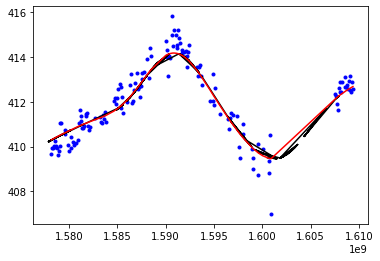

In [5]:
#### BEGIN 
#### yFIT test only
y = mpf.yfitdata(data)
x=data['tepoch']
print(y.shape)
ax0=plt.subplot(1,1,1)
ax0.plot(dset['tepoch'],dset['xco2avg'],'b.')
ax0.plot(x,y,'k-')
ax0.plot(dset['tepoch'],dset['yfitavg'],'r-')
plt.show()
#### END 

In [ ]:
if testwithdset == 1:
    tmintest=(datetime.datetime(2020,4,10,0,0,0)-to).total_seconds()
    tmaxtest=(datetime.datetime(2020,4,12,0,0,0)-to).total_seconds()
    masktest = (tmintest <= data['tepoch']) & (tmaxtest >= data['tepoch'])
    datarowminus1 = 14
    print(dset['xCO2altz'][datarowminus1],dset['psurfaltz'][datarowminus1])
    datatest = copy.copy(data[masktest])
    datatest[name] = (datatest[name]*datatest[psurf] - dset['xCO2altz'][datarowminus1]*dset['psurfaltz'][datarowminus1])/(datatest[psurf]-dset['psurfaltz'][datarowminus1])
    print(datatest[name].shape)
    print(datos[name][masktest].shape)
    np.array_equal(datatest[name],datos[name][masktest])

In [ ]:
datemin = datetime.datetime(2020,1,1,0,0,0)
datemax = datetime.datetime(2020,6,30,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()

matrix1,stdmat1,errmat1=mpf.matrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
matrix2,stdmat2,errmat2=mpf.matrixforinterval(tmin,tmax,datos,lats,lons,name,footprintradio)
matrixc,stdmatc,errmatc=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)
mdiff = matrix2 - matrixc
stddiff = stdmat2 - stdmatc
errdiff = errmat2 - errmatc
#np.save('matrixDelta0605',matrix)

In [ ]:
filtermatrix1 = psurfmat
filtervalue1 = 639.25
filtermatrix2 = psurfmat 
filtervalue2 = 639.25
filtermatrix3 = psurfmat 
filtervalue3 = 639.25
matrix1f=np.where(filtermatrix1>filtervalue1,matrix1,np.nan)
matrix2f=np.where(filtermatrix2>filtervalue2,matrix2,np.nan)
matrixcf=np.where(filtermatrix3>filtervalue3,matrixc,np.nan)
stdmat1f=np.where(filtermatrix1>filtervalue1,stdmat1,np.nan)
stdmat2f=np.where(filtermatrix2>filtervalue2,stdmat2,np.nan)
stdmatcf=np.where(filtermatrix3>filtervalue3,stdmatc,np.nan)
errmat1f=np.where(filtermatrix1>filtervalue1,errmat1,np.nan)
errmat2f=np.where(filtermatrix2>filtervalue2,errmat2,np.nan)
errmatcf=np.where(filtermatrix3>filtervalue3,errmatc,np.nan)

In [ ]:
tyr= datemin.strftime("%Y")
if datemin.strftime("%b") == datemax.strftime("%b"):
    tmt= datemin.strftime("%b") + " "
else:
    tmt = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
tdy=''
mldxco2 = 'P_surf_Avg '
title1 = 'xCO2 ' + tmt + tdy + tyr
title2 = 'xCO2 ML ' + tmt + tdy + tyr
title3 = 'xCO2 ML ' + mldxco2 + tmt + tdy + tyr
title4 = 'Std Dev ' + tmt + tdy + tyr
title5 = 'Std Dev ' + tmt + tdy + tyr
title6 = 'Std Dev ' + mldxco2 + tmt + tdy + tyr
title7 = 'Std Error ' + tmt + tdy + tyr
title8 = 'Std Error ' + tmt + tdy + tyr
title9 = 'Std Error ' + mldxco2 + tmt + tdy + tyr

lvls1 = np.arange(408,420,.5)
lvls2 = np.arange(400,450,1)
lvls3 = np.arange(400,450,1)
lvls4 = np.arange(0,31,1)
lvls5 = np.arange(0,31,1)
lvls6 = np.arange(0,31,1)
lvls7 = np.arange(0,15.5,0.5)
lvls8 = np.arange(0,15.5,0.5)
lvls9 = np.arange(0,15.5,0.5)

titles = [title1,title2,title3,title4,title5,title6,title7,title8,title9]
matrices = [matrix2,matrixc,mdiff,stdmat2,stdmatc,stddiff,errmat2,errmatc,errdiff]
matricesf = [matrix1f,matrix2f,matrixcf,stdmat1f,stdmat2f,stdmatcf,errmat1f,errmat2f,errmatcf]
lvls = [lvls1,lvls2,lvls3,lvls4,lvls5,lvls6,lvls7,lvls8,lvls9]


# Creates the map
mpf.mappernxm(latmin,latmax,lonmin,lonmax,lons,lats,rows,cols,titles,fontsize,ticksize,lvls,matricesf,figname,savefig,cbarname)

In [ ]:
months = np.arange(1,13)
monthmats = []
monthstdmats = []
montherrmats = []
monthtitles = []
monthlvls = []
for ele in months:
    lastday=monthrange(2020,ele)
    datemin = datetime.datetime(2020,ele,1)
    datemax = datetime.datetime(2020,ele,lastday[1],23,59,59)
    tmin=(datemin-to).total_seconds()
    tmax=(datemax-to).total_seconds()
    monthlvl = np.arange(0,25,1)
    monthtitle=''+datemin.strftime("%b")+' 2020'
    monthmat,monthstdmat,montherrmat=mpf.hourlymatrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
    monthmat=np.where(monthmat!=0,monthmat,np.nan)
    monthstdmat=np.where(monthstdmat!=0,monthstdmat,np.nan)
    montherrmat=np.where(montherrmat!=0,montherrmat,np.nan)
    monthmats.append(monthmat)
    monthstdmats.append(monthstdmat)
    montherrmats.append(montherrmat)
    monthtitles.append(monthtitle)
    monthlvls.append(monthlvl)

In [14]:
months = np.arange(1,13)
monthmats = []
monthtitles = []
monthlvls = []
for ele in months:
    lastday=monthrange(2020,ele)
    datemin = datetime.datetime(2020,ele,1)
    datemax = datetime.datetime(2020,ele,lastday[1],23,59,59)
    tmin=(datemin-to).total_seconds()
    tmax=(datemax-to).total_seconds()
    monthlvl = np.arange(0,96,1)
    monthtitle=''+datemin.strftime("%b")+' 2020'
    monthmat=mpf.countermatrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
    monthmat=np.where(monthmat!=0,monthmat,np.nan)
    monthmats.append(monthmat)
    monthtitles.append(monthtitle)
    monthlvls.append(monthlvl)

In [15]:
print(countermatrix)

NameError: name 'countermatrix' is not defined

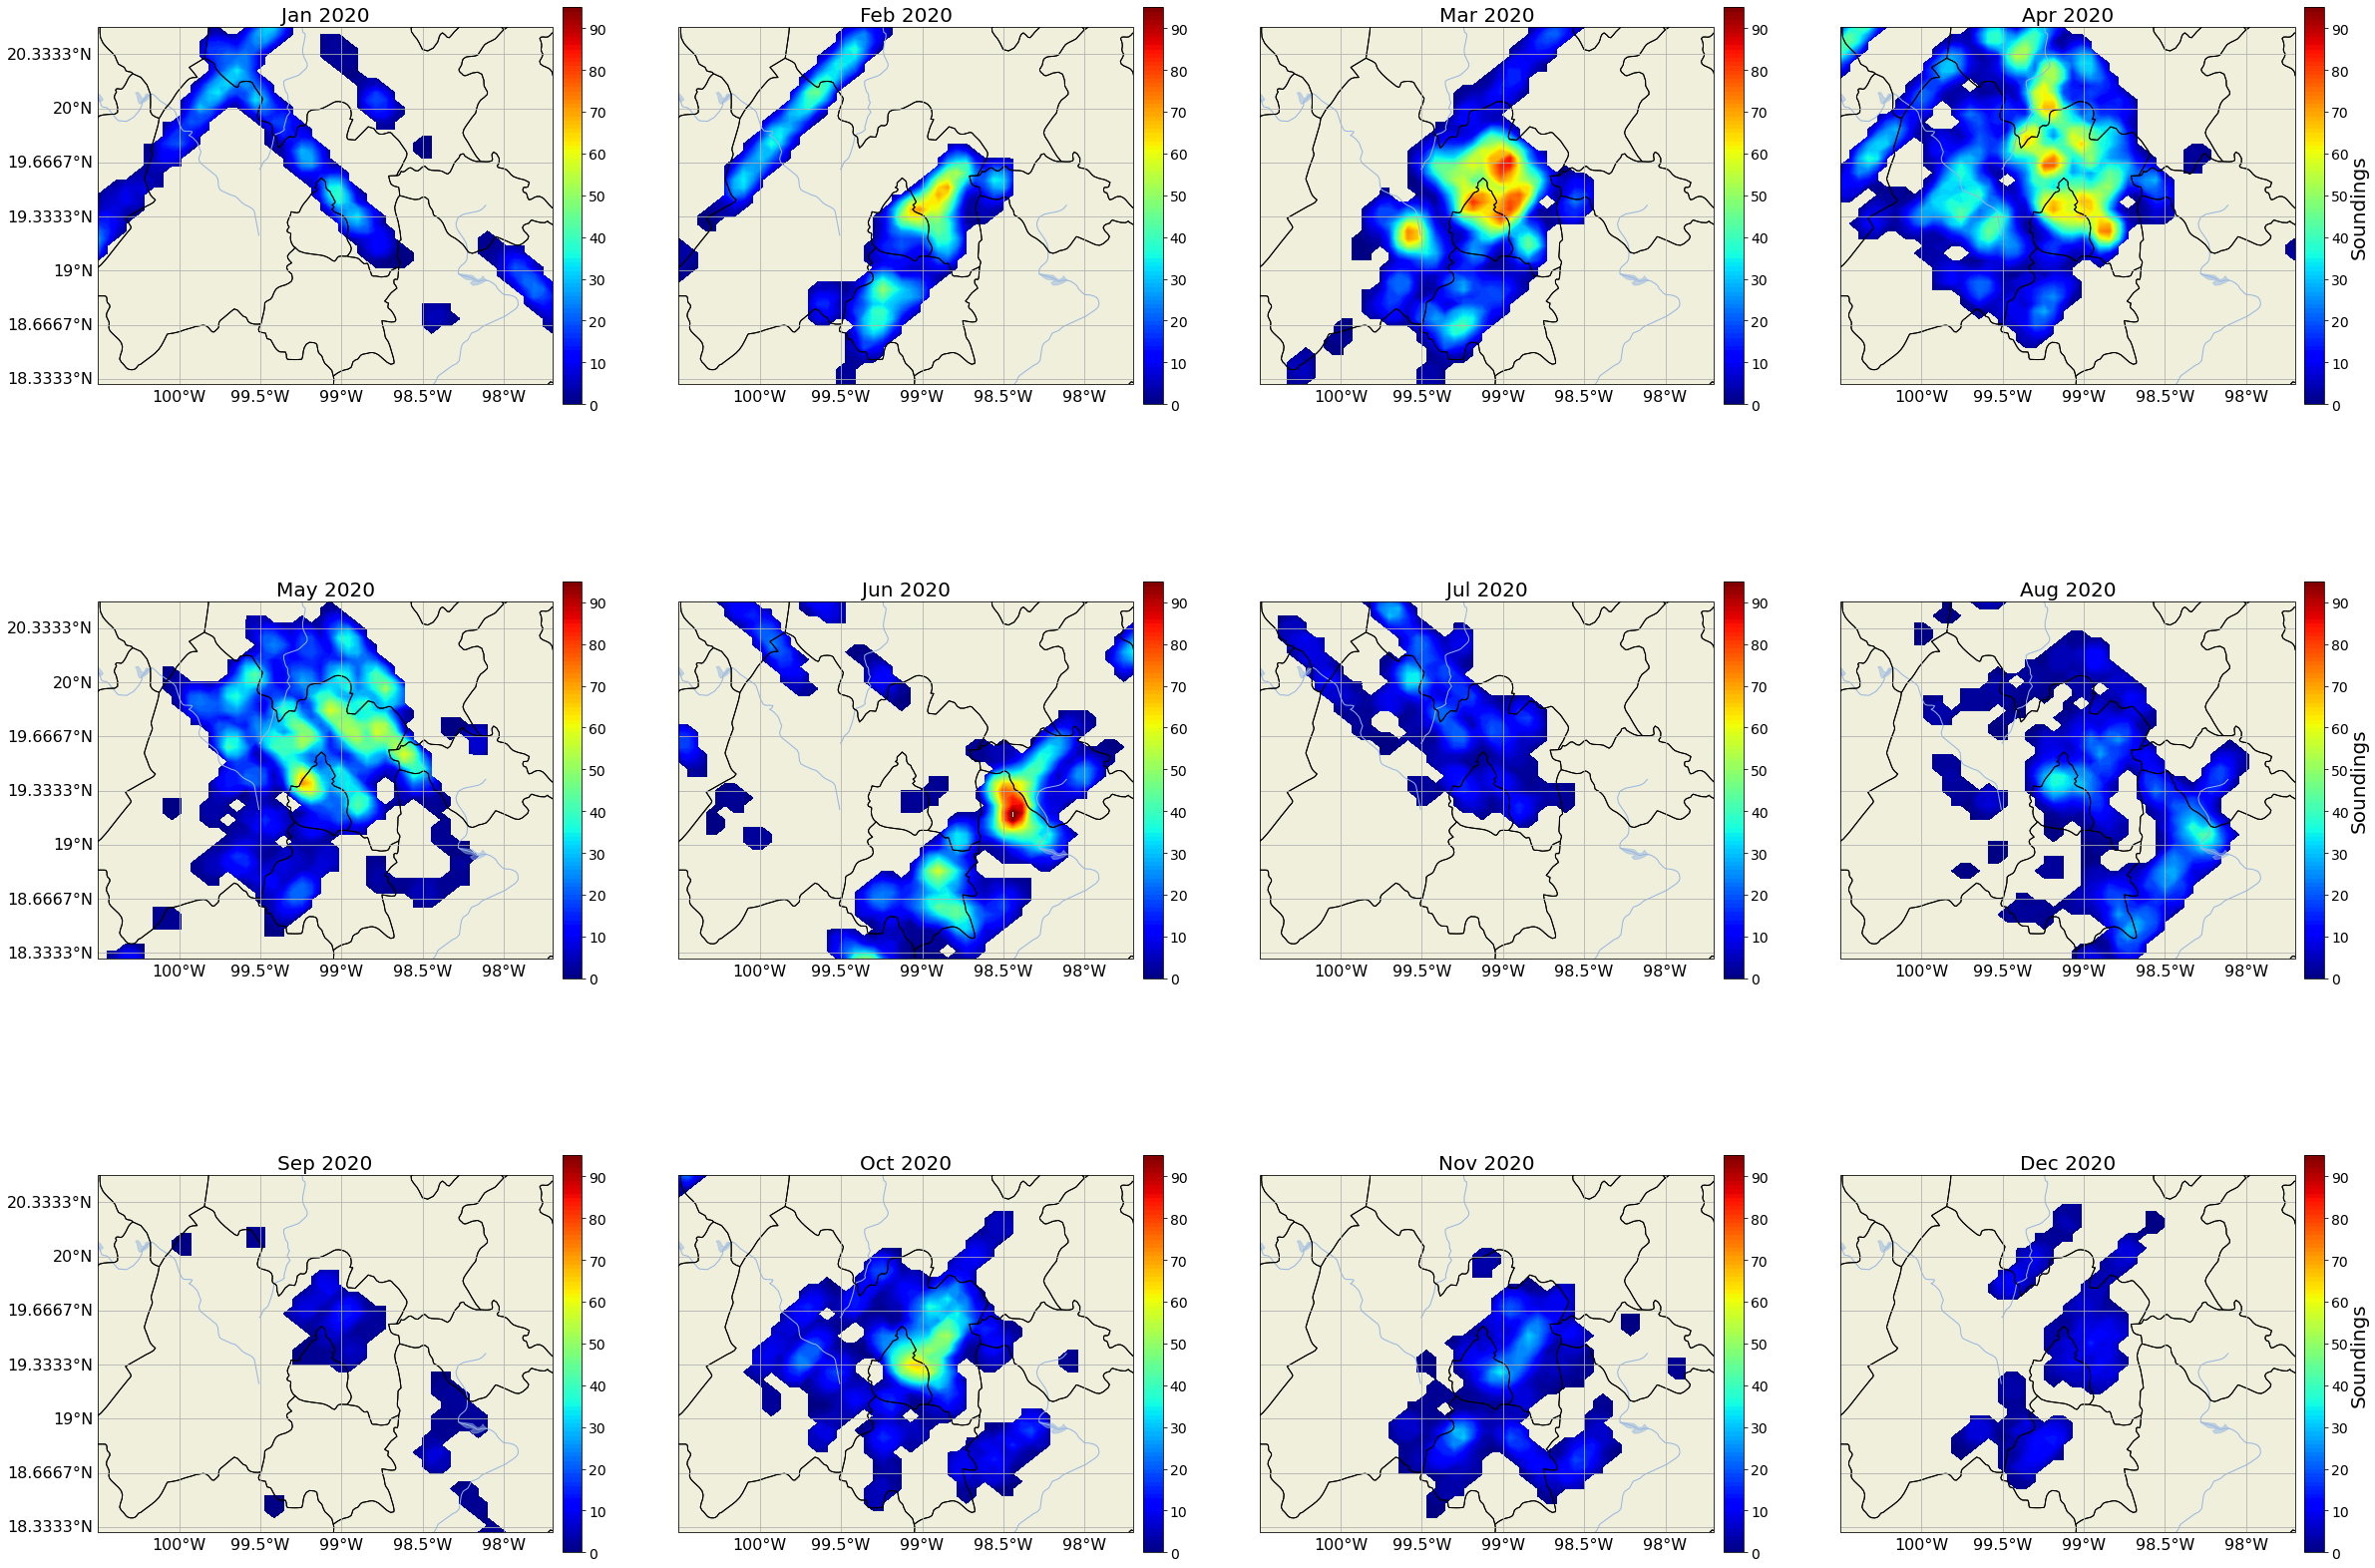

In [16]:
titles = monthtitles
matrices = monthmats
lvls = monthlvls


# Creates the map
mpf.mappernxm(latmin,latmax,lonmin,lonmax,lons,lats,rows,cols,titles,fontsize,ticksize,lvls,matrices,figname,savefig,cbarname)

In [ ]:
##########################################################################################################
#TESTING STARTS HERE

In [ ]:
print(datac.shape,datos.shape)

In [ ]:
np.array_equal(data[name],datac[name])

In [ ]:
print(matrixc)

In [ ]:
dset.close()
mset.close()

In [ ]:
dset2 = np.load('altzrefavg.npz', 'r')
t0 = datetime.datetime.utcfromtimestamp(0.0)
dsetepoch = np.array([(datetime.datetime(year=2020,month=dset2['month'][i],day=dset2['day'][i]) - t0).total_seconds() for i,dum in enumerate(dset2['month'])])

In [ ]:
print(dsetepoch)

In [ ]:
timestamp=copy.copy(data['tepoch'])
timerow1 = datetime.datetime.utcfromtimestamp(timestamp[0])
timerow1ymd = (datetime.datetime(year=timerow1.year,month=timerow1.month,day=timerow1.day) - t0).total_seconds()
if timerow1ymd in dsetepoch:
    print(timerow1.strftime("%b/%d-%H:%M")," match")
else:
    print(timerow1.strftime("%b/%d-%H:%M")," no match")
for i,ele in enumerate(timestamp):
    timerow2 = datetime.datetime.utcfromtimestamp(ele)
    timerow2ymd = (datetime.datetime(year=timerow2.year,month=timerow2.month,day=timerow2.day) - t0).total_seconds()
    if (timerow2.strftime("%b") == timerow1.strftime("%b")) & (timerow2.strftime("%d") == timerow1.strftime("%d")):
        pass
    else:
        if timerow2ymd in dsetepoch:
            print(timerow2.strftime("%b/%d-%H:%M")," match")
        else:
            print(timerow2.strftime("%b/%d-%H:%M")," no match")
    timerow1 = timerow2

In [ ]:
dset2.close()

In [ ]:
timestamp=copy.copy(data['tepoch'])
t0 = datetime.datetime.utcfromtimestamp(0.0)
timerow = datetime.datetime.utcfromtimestamp(timestamp[0])
timerowymd = (datetime.datetime(year=timerow.year,month=timerow.month,day=timerow.day) - t0).total_seconds()
daylist = [timerowymd,timerow.year,timerow.month,timerow.day]
print(daylist)
for i,ele in enumerate(timestamp):
    timerow = datetime.datetime.utcfromtimestamp(ele)
    timerowymd = (datetime.datetime(year=timerow.year,month=timerow.month,day=timerow.day) - t0).total_seconds()
    daylist_inter = [timerowymd,timerow.year,timerow.month,timerow.day]
    if timerowymd not in daylist:
        print(daylist_inter)
        daylist = np.vstack((daylist,daylist_inter))
    

In [ ]:
print(daylist.shape,daylist)

In [ ]:
tepoch = daylist[:,0].astype(int)
year = daylist[:,1].astype(int)
month = daylist[:,2].astype(int)
day = daylist[:,3].astype(int)
np.savez('targetdatadays',tepoch=tepoch,year=year,month=month,day=day)

In [ ]:
daset = np.load('targetdatadays.npz', 'r')
m = daset['tepoch']
for i, ele in enumerate(m):
    datarow = daset['tepoch'][i],daset['year'][i],daset['month'][i],daset['day'][i]
    print(datarow)

In [ ]:
daset.close()